# What is this project about?
This midterm project is part of the ML Zoomcamp 2022 Cohort. This analyses the students performance post alcohol consumption. The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. We will explore the portuguese dataset only and try to predict students final grade based on the available data.

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler as scaler 
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV as RSCV 


from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [3]:
pd.set_option('display.max_columns', None)

# Data preparation 

In [134]:
#df_mat = pd.read_csv('../data/student-mat.csv')
df = pd.read_csv('../data/student-por.csv')

In [135]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


The following are the attributes for both student-mat.csv (Math course)| and student-por.csv (Portuguese language course)| datasets:
|S.No.|Feature|Description|Type|Range/Levels|
|---|---|---|---|---|
|1. | school | student's school |(binary:| 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)||
|2. | sex | student's sex |(binary: 'F' - female or 'M' - male)|
|3. | age | student's age |(numeric: from 15 to 22)|
|4. | address | student's home address type |(binary: 'U' - urban or 'R' - rural)|
|5. | famsize | family size |(binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)|
|6. | Pstatus | parent's cohabitation status |(binary: 'T' - living together or 'A' | apart)|
|7. | Medu | mother's education |(numeric: 0 - none, 1 - primary education (4th grade)|, 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)|
|8. | Fedu | father's education |(numeric: 0 - none, 1 - primary education (4th grade)|, 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)|
|8. | Mjob | mother's job |(nominal: 'teacher', 'health' care related, civil 'services' (e.g. | administrative or police)|, 'at_home' or 'other')|
|9. | Fjob | father's job |(nominal: 'teacher', 'health' care related, civil 'services' (e.g. | administrative or police)|, 'at_home' or 'other')|
|10. | reason | reason to choose this school |(nominal: close to 'home', school 'reputation', 'course' preference or 'other')|
|11. | guardian | student's guardian |(nominal: 'mother', 'father' or 'other')|
|12. | traveltime | home to school travel time |(numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. | to 1 hour, or 4 - >1 hour)|
|13. | studytime | weekly study time |(numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)|
|14. | failures | number of past class failures |(numeric: n if 1<=n<3, else 4)|
|15. | schoolsup | extra educational support |(binary: yes or no)|
|16. | famsup | family educational support |(binary: yes or no)|
|17. | paid | extra paid classes within the course subject (Math or Portuguese) |(binary: yes or no)|
|18. | activities | extra-curricular activities |(binary: yes or no)|
|19. | nursery | attended nursery school |(binary: yes or no)|
|20. | higher | wants to take higher education |(binary: yes or no)|
|21. | internet | Internet access at home |(inary: yes or no)|
|22. | romantic | with a romantic relationship |(inary: yes or no)|
|23. | famrel | quality of family relationships |(numeric: from 1 - very bad to 5 - excellent)|
|24. | freetime | free time after school |(numeric: from 1 - very low to 5 - very high)|
|25. | goout | going out with friends |(numeric: from 1 - very low to 5 - very high)|
|26. | Dalc | workday alcohol consumption |(numeric: from 1 - very low to 5 - very high)|
|27. | Walc | weekend alcohol consumption |(numeric: from 1 - very low to 5 - very high)|
|28. | health | current health status |(numeric: from 1 - very bad to 5 - very good)|
|29. | absences | number of school absences |(numeric: from 0 to 93)|
|30. | G1 | first period grade |(numeric: from 0 to 20)|
|31. | G2 | second period grade |(numeric: from 0 to 20)|
|33. | G3 | final grade |(numeric: from 0 to 20, output target)|

In [136]:
df.shape

(649, 33)

In [137]:
df.isnull().mean()

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

We will analayse how the grade G3 is distributed.

In [139]:
df['G3'].value_counts()

11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: G3, dtype: int64

Text(0, 0.5, 'Frequency/ count')

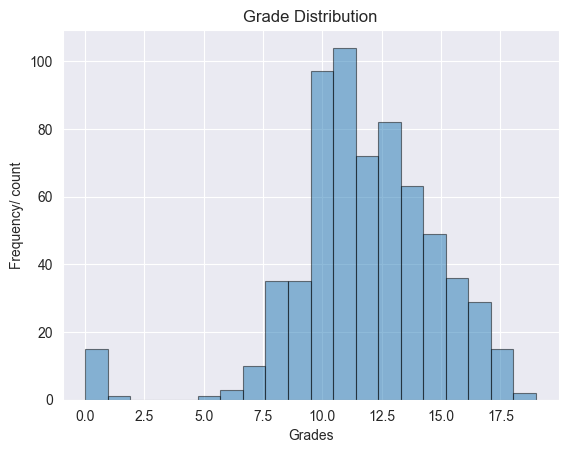

In [141]:
plt.hist(df['G3'], bins=20, alpha=0.5, align='mid', edgecolor='black', linewidth=0.8)
plt.title('Grade Distribution')
plt.xlabel('Grades')
plt.ylabel('Frequency/ count')

## Distribution

In [148]:
# Looks like a near normal distribution except the 0 grades

In [149]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'grade'],
      dtype='object')

In [152]:
categorical = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health']
numerical = [col for col in df.columns if col not in categorical]

In [153]:
numerical

['age',
 'traveltime',
 'studytime',
 'failures',
 'absences',
 'G1',
 'G2',
 'G3',
 'grade']

Let's look at the number of unique entries for each categorical column

In [154]:
df[categorical].nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Medu          5
Fedu          5
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
famrel        5
freetime      5
goout         5
Dalc          5
Walc          5
health        5
dtype: int64

Let's look at the proportions of each value per categorical column.

In [24]:
for col in categorical:
    display(df[col].value_counts(normalize=True).to_frame())

,school
GP,0.651772
MS,0.348228


,sex
F,0.590139
M,0.409861


,address
U,0.696456
R,0.303544


,famsize
GT3,0.70416
LE3,0.29584


,Pstatus
T,0.876733
A,0.123267


,Medu
2,0.286595
4,0.269646
1,0.220339
3,0.214176
0,0.009245


,Fedu
2,0.322034
1,0.268105
3,0.201849
4,0.197227
0,0.010786


,Mjob
other,0.397535
services,0.209553
at_home,0.208012
teacher,0.110940
health,0.073960


,Fjob
other,0.565485
services,0.278891
at_home,0.064715
teacher,0.055470
health,0.035439


,reason
course,0.439137
home,0.229584
reputation,0.220339
other,0.110940


,guardian
mother,0.701079
father,0.235747
other,0.063174


,schoolsup
no,0.895223
yes,0.104777


,famsup
yes,0.613251
no,0.386749


,paid
no,0.939908
yes,0.060092


,activities
no,0.514638
yes,0.485362


,nursery
yes,0.802773
no,0.197227


,higher
yes,0.893683
no,0.106317


,internet
yes,0.767334
no,0.232666


,romantic
no,0.631741
yes,0.368259


,famrel
4,0.488444
5,0.277350
3,0.155624
2,0.044684
1,0.033898


,freetime
3,0.386749
4,0.274268
2,0.164869
5,0.104777
1,0.069337


,goout
3,0.315871
2,0.223421
4,0.217257
5,0.169492
1,0.073960


,Dalc
1,0.694915
2,0.186441
3,0.066256
5,0.026194
4,0.026194


,Walc
1,0.380586
2,0.231125
3,0.184900
4,0.134052
5,0.069337


,health
5,0.383667
3,0.191063
4,0.166410
1,0.138675
2,0.120185


In [155]:
global_mean = df['G3'].mean()
for col in categorical:
    df_group = df.groupby(by=col)['G3'].agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['pct_diff'] = df_group['diff']*100 / global_mean
    display(df_group)

,mean,diff,pct_diff
school,,,
GP,12.576832,0.670823,5.634322
MS,10.650442,-1.255567,-10.545656


,mean,diff,pct_diff
sex,,,
F,12.253264,0.347254,2.916632
M,11.406015,-0.499994,-4.199511


,mean,diff,pct_diff
address,,,
R,11.086294,-0.819715,-6.884883
U,12.263274,0.357265,3.000712


,mean,diff,pct_diff
famsize,,,
GT3,11.811816,-0.094193,-0.791139
LE3,12.130208,0.224199,1.883075


,mean,diff,pct_diff
Pstatus,,,
A,11.912500,0.006491,0.054517
T,11.905097,-0.000913,-0.007665


,mean,diff,pct_diff
Medu,,,
0,11.666667,-0.239343,-2.010267
1,10.797203,-1.108806,-9.312998
2,11.661290,-0.244719,-2.055424
3,11.920863,0.014854,0.124761
4,13.068571,1.162562,9.764499


,mean,diff,pct_diff
Fedu,,,
0,12.142857,0.236848,1.989314
1,10.936782,-0.969228,-8.140659
2,11.784689,-0.121320,-1.018983
3,12.381679,0.475670,3.995211
4,12.921875,1.015866,8.532378


,mean,diff,pct_diff
Mjob,,,
at_home,11.044444,-0.861565,-7.236386
health,13.062500,1.156491,9.713505
other,11.670543,-0.235467,-1.977712
services,12.147059,0.241050,2.024604
teacher,13.138889,1.232880,10.355104


,mean,diff,pct_diff
Fjob,,,
at_home,11.428571,-0.477438,-4.010057
health,12.565217,0.659208,5.536768
other,11.891008,-0.015001,-0.125996
services,11.629834,-0.276175,-2.319627
teacher,13.583333,1.677324,14.088046


,mean,diff,pct_diff
reason,,,
course,11.547368,-0.358641,-3.012267
home,12.181208,0.275199,2.311428
other,10.694444,-1.211565,-10.176078
reputation,12.944056,1.038047,8.718679


,mean,diff,pct_diff
guardian,,,
father,12.202614,0.296605,2.491222
mother,11.896703,-0.009306,-0.078162
other,10.902439,-1.003570,-8.429107


,mean,diff,pct_diff
schoolsup,,,
no,11.979346,0.073337,0.615964
yes,11.279412,-0.626597,-5.262867


,mean,diff,pct_diff
famsup,,,
no,11.665339,-0.240671,-2.021421
yes,12.057789,0.151780,1.274816


,mean,diff,pct_diff
paid,,,
no,11.950820,0.044810,0.376368
yes,11.205128,-0.700881,-5.886784


,mean,diff,pct_diff
activities,,,
no,11.718563,-0.187446,-1.574385
yes,12.104762,0.198753,1.669347


,mean,diff,pct_diff
nursery,,,
no,11.718750,-0.187259,-1.572813
yes,11.952015,0.046006,0.386411


,mean,diff,pct_diff
higher,,,
no,8.797101,-3.108908,-26.112090
yes,12.275862,0.369853,3.106438


,mean,diff,pct_diff
internet,,,
no,11.026490,-0.879519,-7.387187
yes,12.172691,0.266682,2.239890


,mean,diff,pct_diff
romantic,,,
no,12.129268,0.223259,1.875180
yes,11.523013,-0.382997,-3.216835


,mean,diff,pct_diff
famrel,,,
1,10.636364,-1.269646,-10.663906
2,10.862069,-1.043940,-8.768180
3,11.594059,-0.311950,-2.620104
4,12.343849,0.437839,3.677465
5,11.633333,-0.272676,-2.290238


,mean,diff,pct_diff
freetime,,,
1,11.733333,-0.172676,-1.450326
2,12.710280,0.804271,6.755170
3,12.059761,0.153752,1.291379
4,11.713483,-0.192526,-1.617050
5,10.691176,-1.214833,-10.203526


,mean,diff,pct_diff
goout,,,
1,10.729167,-1.176843,-9.884442
2,12.668966,0.762956,6.408161
3,12.151220,0.245210,2.059550
4,11.971631,0.065622,0.551167
5,10.872727,-1.033282,-8.678659


,mean,diff,pct_diff
Dalc,,,
1,12.299335,0.393326,3.303589
2,11.363636,-0.542373,-4.555455
3,11.139535,-0.766474,-6.437710
4,8.941176,-2.964833,-24.901986
5,10.235294,-1.670715,-14.032537


,mean,diff,pct_diff
Walc,,,
1,12.360324,0.454315,3.815843
2,12.260000,0.353991,2.973211
3,11.666667,-0.239343,-2.010267
4,11.034483,-0.871526,-7.320056
5,10.555556,-1.350454,-11.342623


,mean,diff,pct_diff
health,,,
1,12.477778,0.571769,4.802353
2,12.192308,0.286298,2.404655
3,11.838710,-0.067300,-0.565257
4,12.305556,0.399546,3.355837
5,11.469880,-0.436130,-3.663106


In [142]:
df['grade'] = pd.cut(df['G3'], bins=4, labels=['Very poor (0-5)', 'Poor (5-10)', 'Average (10-15)', 'Good (15-20)'],retbins=False)

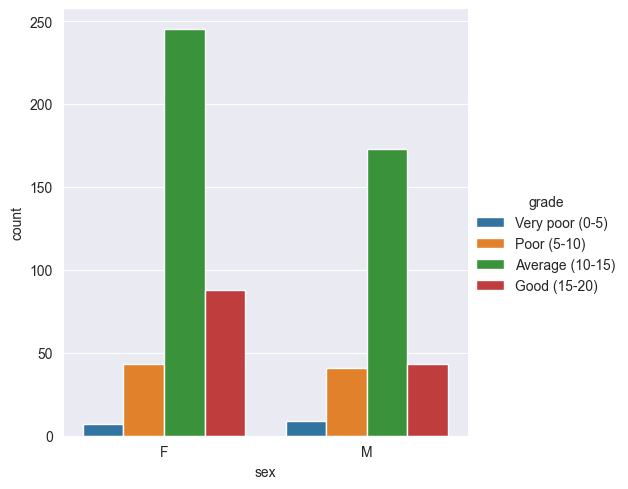

In [143]:
# Gender vs Grade
g = sns.catplot(x="sex", kind="count", data=df, hue="grade")

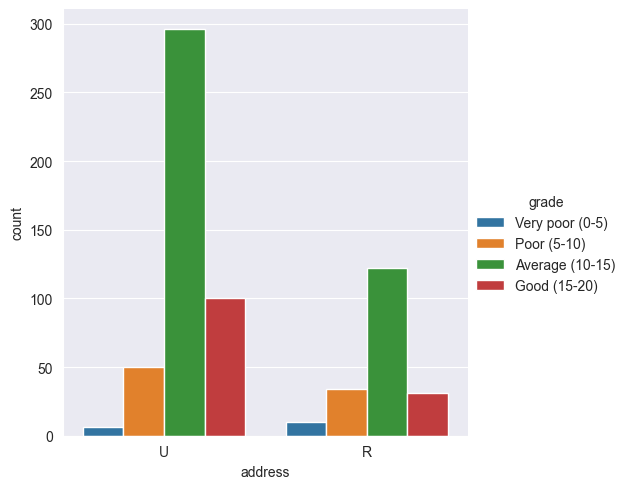

In [144]:
# Address vs Grade
g = sns.catplot(x="address", kind="count", data=df, hue="grade")

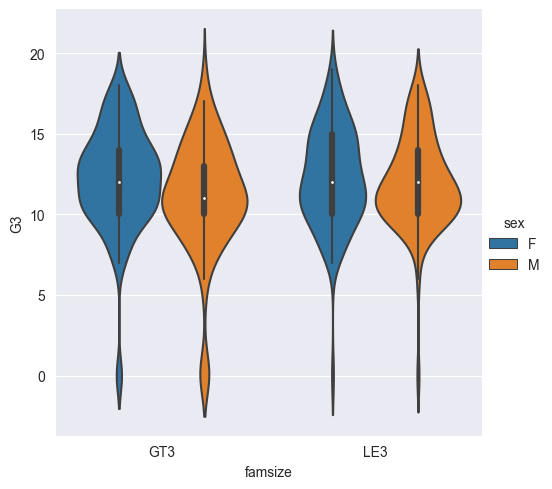

In [145]:
sns.catplot(data=df, x="famsize", y="G3", hue="sex", kind="violin")

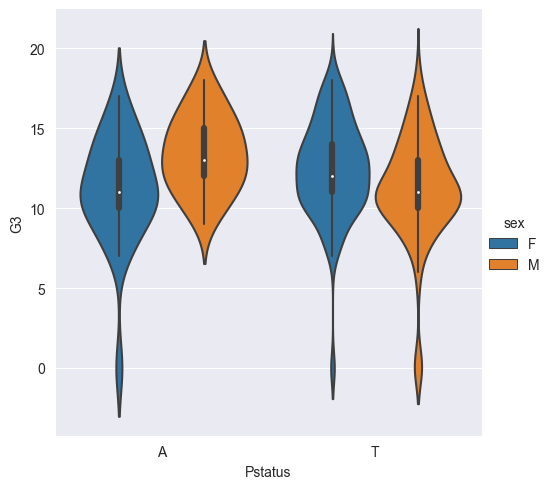

In [146]:
sns.catplot(data=df, x="Pstatus", y="G3", hue="sex", kind="violin")

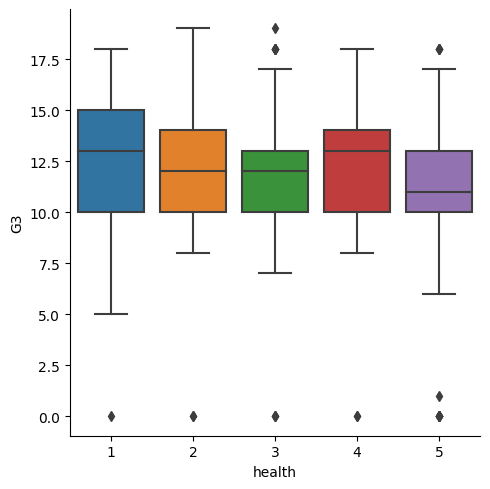

In [18]:
sns.catplot(data=df, x="health", y="G3", kind="box")

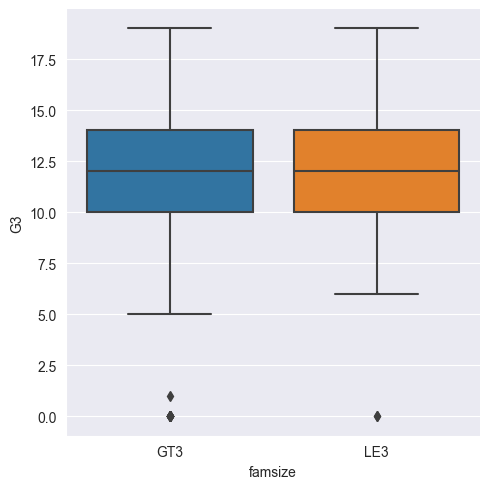

In [147]:
sns.catplot(data=df, x="famsize", y="G3", kind="box")

### Feature importance analysis
We will now look at the Mutual information score for the categorical variables to understand their feature importance.

In [156]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, df['G3'])

df_mi = df[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi)

,MI
Medu,0.102087
Fedu,0.089464
higher,0.079198
Mjob,0.078865
Dalc,0.077472
goout,0.075883
school,0.072212
Walc,0.070865
reason,0.068273
freetime,0.064179


It looks like the `Medu` has highest MI score followed by `Fedu`. It does make some sense. The more educated the parents are the better the scores are.

In [ ]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
# Notebook (suggested name - notebook.ipynb) with
# Data preparation and data clearning
# EDA, feature importance analysis
# Model selection process and parameter tuning

### Data preparation and cleaning

In [30]:
from sklearn.model_selection import train_test_split

In [197]:
df_train_full, df_test = train_test_split(df, test_size=0.1, random_state=1)

df_train, df_val = train_test_split(df_train_full, test_size=0.11, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train["G3"].values
y_val = df_val["G3"].values
y_test = df_test["G3"].values

del df_train["G3"]
del df_val["G3"]
del df_test["G3"]



In [198]:
df_train.shape, df_val.shape, df_test.shape

((519, 33), (65, 33), (65, 33))

In [209]:
features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences']
train_dict = df_train[features].to_dict(orient='records')

dict_vect = DictVectorizer(sparse=False)
X_train = dict_vect.fit_transform(train_dict)


### Model selection process and parameter tuning

#### Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

In [200]:
model = LinearRegression()

In [201]:
model.fit(X_train, y_train)

LinearRegression()

In [210]:
val_dict = df_val[features].to_dict(orient='records')
X_val = dict_vect.transform(val_dict)

In [214]:
X_val

array([[1., 2., 0., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 3., 2.],
       [1., 2., 0., ..., 0., 4., 1.],
       ...,
       [1., 1., 0., ..., 0., 4., 2.],
       [2., 2., 0., ..., 0., 3., 1.],
       [5., 2., 0., ..., 1., 2., 1.]])

In [215]:
y_pred_val = model.predict(X_val)

In [222]:
rmse_lr = np.sqrt(mean_squared_error(y_pred_val, y_val))

In [233]:
rmse_lr

2.336003910707591

In [218]:
y_pred_val

array([12.3515625 , 13.29003906, 14.30859375, 13.89257812, 12.6953125 ,
       12.24804688, 11.61914062,  9.8359375 , 14.63574219, 12.40136719,
       11.93261719, 13.56445312, 12.0546875 , 13.00292969, 12.87890625,
        9.82519531, 11.25195312, 15.359375  , 13.07226562, 12.79003906,
       12.83007812, 12.26464844, 13.81542969,  7.44628906, 14.65234375,
       13.74121094, 13.4609375 , 13.13183594, 10.93359375, 12.44726562,
       12.60839844, 14.15332031, 11.17773438, 14.14160156, 11.69335938,
       12.39160156, 14.06933594, 13.86621094, 12.06738281,  8.44824219,
       12.86230469, 12.46289062,  6.34667969, 14.95996094, 12.734375  ,
        9.87011719, 13.33105469, 13.234375  , 12.94628906, 12.25976562,
       13.60546875, 11.15917969, 14.04980469, 14.43847656, 13.5859375 ,
       10.85644531,  9.07421875, 11.42871094, 11.37695312, 14.46972656,
       13.61425781, 12.58203125, 12.90136719, 13.50097656, 12.12695312])

In [219]:
y_val

array([12, 16, 12, 10, 12, 11, 12, 10, 15, 17, 11, 14, 13, 13, 11, 13, 11,
       15, 15, 11, 16, 13, 14, 10, 15, 13, 14, 17,  9, 13, 12, 17, 11, 12,
       10, 13, 15, 17, 13,  7, 11, 14,  8, 17, 12,  8, 17, 14, 17, 11, 13,
       13, 13, 13, 11, 10,  0, 15, 13, 17, 10, 15, 13, 10, 16])

#### Random Forest

In [223]:
model_rf = RandomForestRegressor()

In [224]:
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [230]:
y_pred_val_rf = model_rf.predict(X_val)

In [231]:
rmse_rf = np.sqrt(mean_squared_error(y_pred_val_rf, y_val))

In [232]:
rmse_rf

2.3442997970527446

In [1]:
import pickle